Lab | Feature engineering
In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.
Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

Check for null values in the numerical columns.
Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
Use appropriate EDA technique where ever necessary.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Usuari\Downloads\learningSet.csv\learningSet.csv",low_memory=False)

In [5]:
# Paso 1: Verificar valores nulos en las columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns
null_counts = df[numerical_cols].isnull().sum()
print("Valores nulos en columnas numéricas:")
print(null_counts[null_counts > 0])

Valores nulos en columnas numéricas:
AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64


In [8]:
# Paso 2: Limpiar las columnas especificadas
# Para ilustrar, aplicaré algunas técnicas de limpieza de datos comunes. Esto puede necesitar ajustes dependiendo del contenido específico de las columnas.

# GEOCODE2 - Rellenar valores nulos con una categoría específica, por ejemplo 'Unknown'
df['GEOCODE2'] = df['GEOCODE2'].fillna('Unknown')

# WEALTH1 - Rellenar valores nulos con la mediana o una categoría específica
df['WEALTH1'] = df['WEALTH1'].fillna(df['WEALTH1'].median())

# ADI - Rellenar valores nulos con la mediana
df['ADI'] = df['ADI'].fillna(df['ADI'].median())

# DMA - Rellenar valores nulos con la mediana
df['DMA'] = df['DMA'].fillna(df['DMA'].median())

# MSA - Rellenar valores nulos con la mediana
df['MSA'] = df['MSA'].fillna(df['MSA'].median())

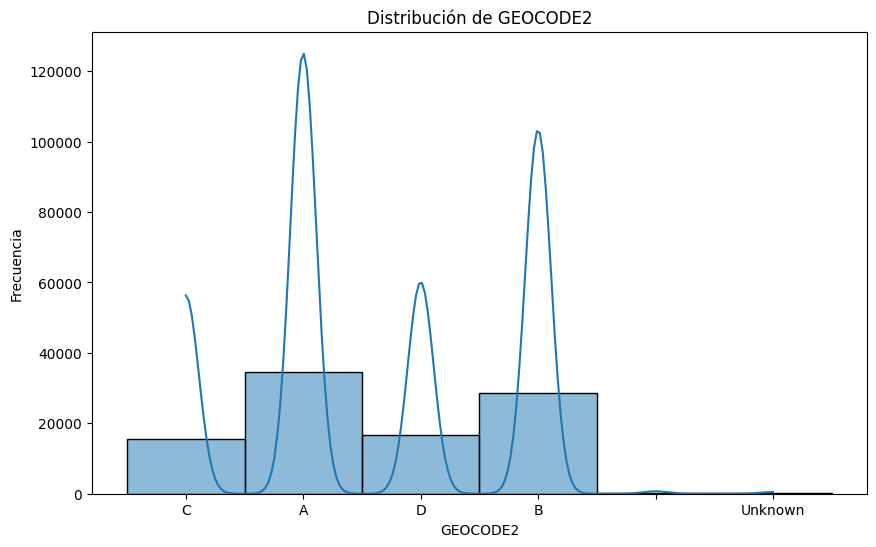

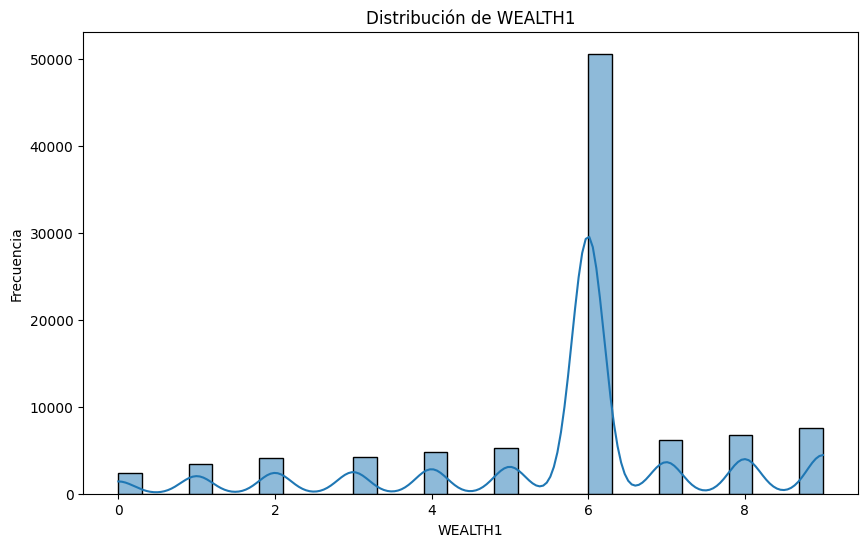

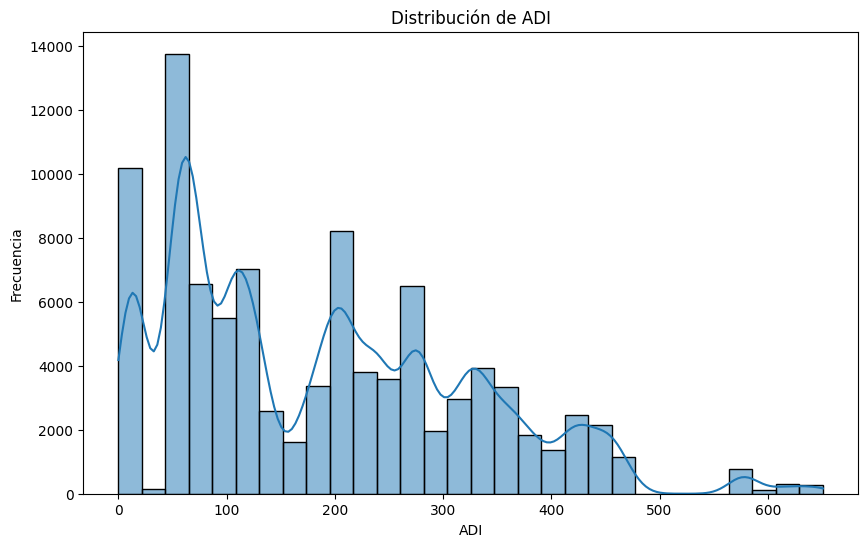

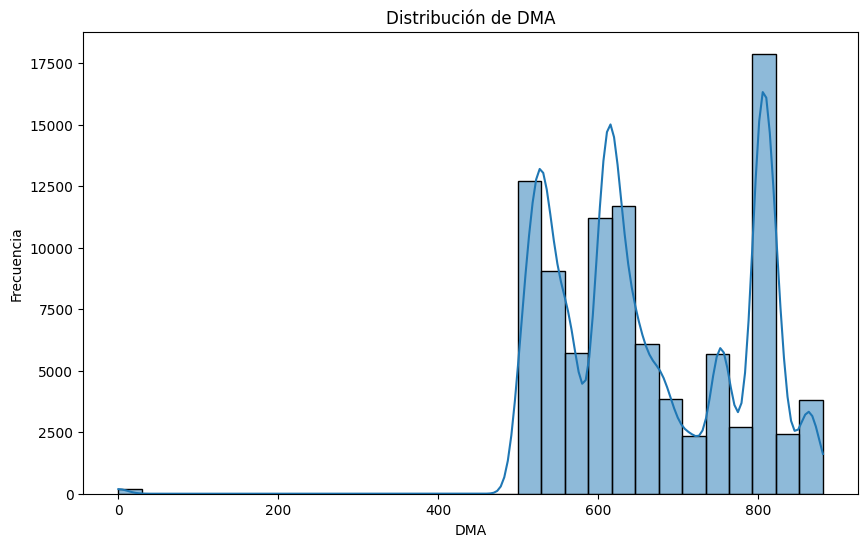

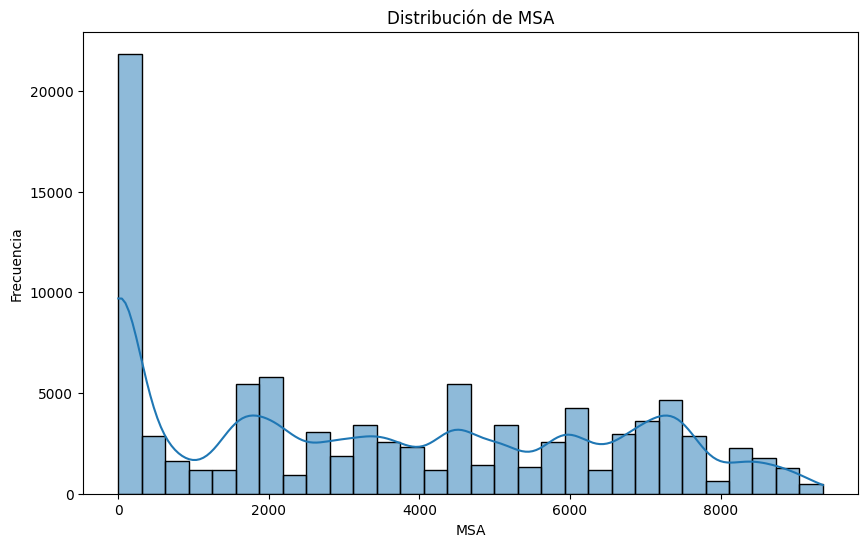

Valores nulos después de la limpieza:
GEOCODE2    0
WEALTH1     0
ADI         0
DMA         0
MSA         0
dtype: int64


In [9]:
# Paso 3: EDA según sea necesario
# Histograma para ver la distribución de las columnas limpiadas
columns_to_plot = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Verificar valores nulos después de la limpieza
null_counts_after_cleaning = df[columns_to_plot].isnull().sum()
print("Valores nulos después de la limpieza:")
print(null_counts_after_cleaning)

Conclusiones del Análisis de Distribuciones
Distribución de GEOCODE2:

La variable GEOCODE2 muestra una distribución con varias categorías principales: A, B, C, D y Unknown.
La categoría A es la más frecuente, seguida por B, C y D.
La categoría Unknown tiene una frecuencia significativamente menor en comparación con las otras categorías.
Distribución de WEALTH1:

La variable WEALTH1 presenta una distribución multimodal con picos significativos en varios puntos.
El valor 6 es el más frecuente, seguido por varios otros valores, incluyendo 1, 2, 3, 4, 5, 7, 8 y 9.
El valor 0 también tiene una presencia notable, lo que podría indicar la ausencia de datos de riqueza para esas observaciones.
Distribución de ADI:

La variable ADI muestra una distribución sesgada a la derecha, con la mayoría de los valores concentrados en el rango de 0 a 200.
Hay una disminución gradual en la frecuencia a medida que los valores de ADI aumentan.
Distribución de DMA:

La variable DMA presenta una distribución multimodal con varios picos en diferentes puntos.
Los picos más altos se observan en los valores cercanos a 600 y 800.
Distribución de MSA:

La variable MSA muestra una distribución sesgada a la derecha, similar a la de ADI.
La mayoría de los valores están concentrados en el rango de 0 a 2000, con varios picos en diferentes puntos, especialmente alrededor de 1000, 2000 y 3000.
Siguiente Paso: Limpieza de las Variables
1. Limpieza de la Variable GEOCODE2:
Dado que GEOCODE2 contiene una categoría Unknown, se puede considerar reemplazarla con el valor más frecuente o con una categoría específica de "Desconocido" para mantener la consistencia en los datos.
2. Limpieza de la Variable WEALTH1:
WEALTH1 presenta valores multimodales, por lo que se debe verificar si estos valores corresponden a categorías distintas de riqueza. Los valores 0 pueden ser tratados como datos faltantes y reemplazados por el valor más frecuente o por la mediana de los datos.
3. Limpieza de las Variables ADI, DMA y MSA:
Para estas variables, es importante identificar y manejar los valores atípicos (outliers) que pueden influir en los análisis posteriores.
También se puede considerar agrupar valores en rangos específicos para simplificar la interpretación de los datos.

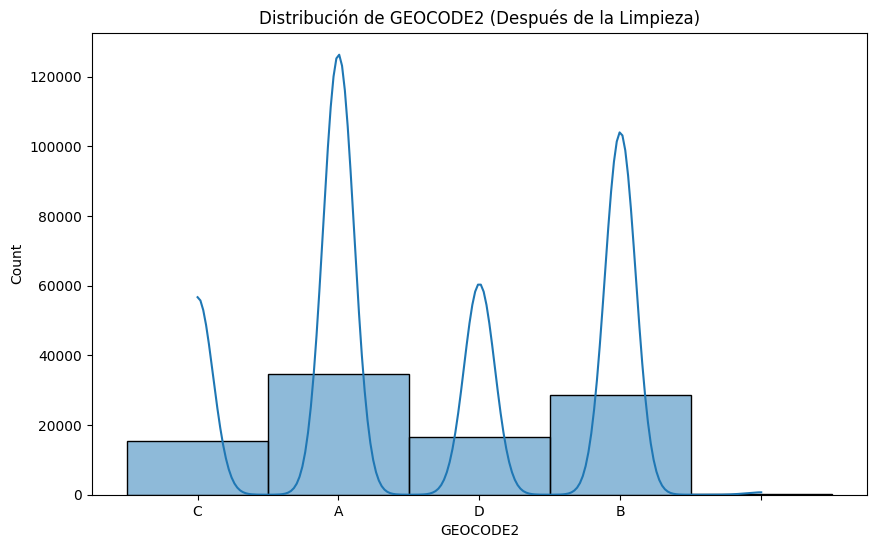

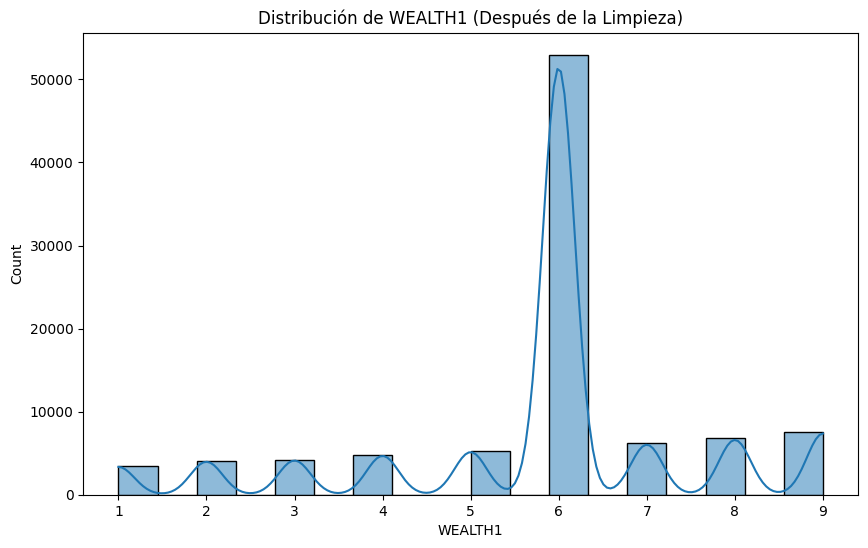

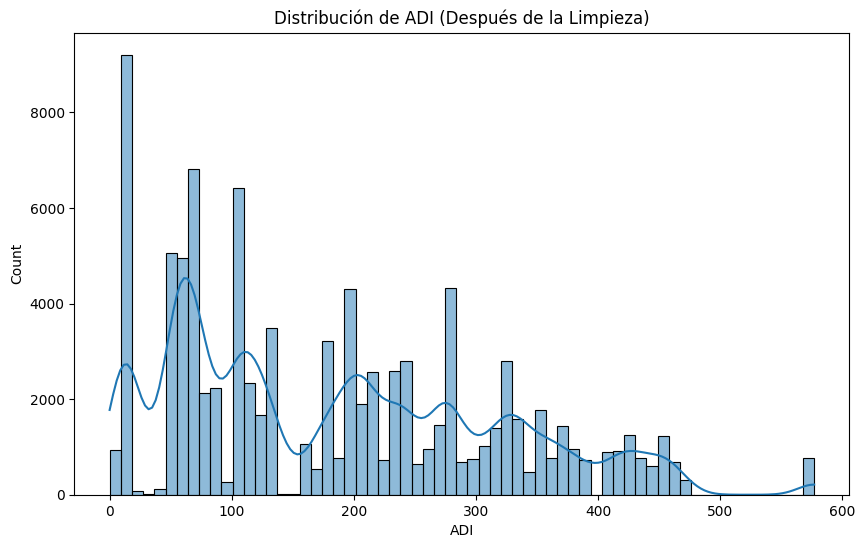

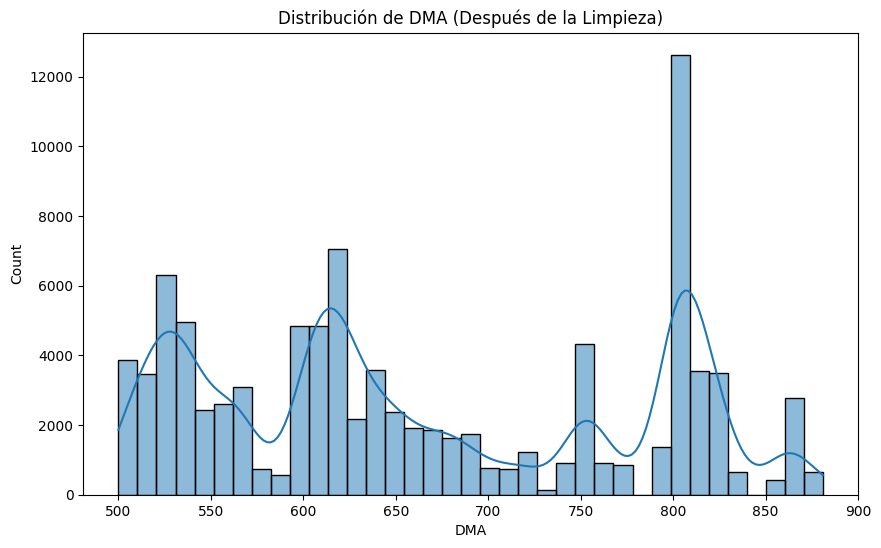

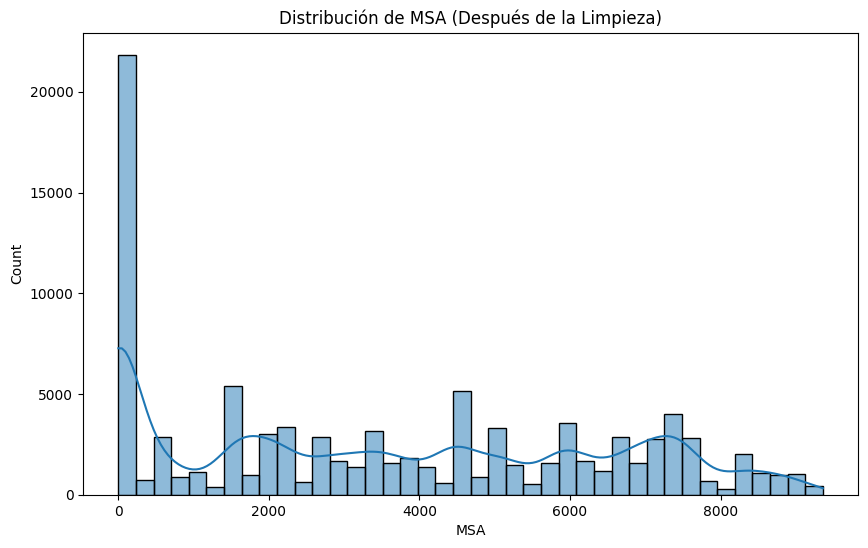

In [10]:

# Limpieza de GEOCODE2
df['GEOCODE2'] = df['GEOCODE2'].replace('Unknown', 'A')  # Reemplazar 'Unknown' con la categoría más frecuente

# Limpieza de WEALTH1
df['WEALTH1'] = df['WEALTH1'].replace(0, df['WEALTH1'].mode()[0])  # Reemplazar 0 con la moda (valor más frecuente)

# Manejo de valores atípicos en ADI, DMA y MSA
for col in ['ADI', 'DMA', 'MSA']:
    # Reemplazar valores atípicos con la mediana
    median = df[col].median()
    std = df[col].std()
    outliers = (df[col] - median).abs() > (3 * std)
    df.loc[outliers, col] = median

# Verificar distribuciones después de la limpieza
columns_to_plot = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col} (Después de la Limpieza)')
    plt.show()
